In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [ ]:
tf.keras.backend.clear_session()
df = pd.read_csv('IRIS.csv')

In [ ]:
df.head()

In [ ]:
one_hot_df = pd.get_dummies(df['species'], prefix='species')
# print(one_hot_df)

In [ ]:
X = df.drop(['species'],axis=1).values
y = one_hot_df.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
model = tf.keras.models.Sequential(name='MLP')

In [ ]:
n_hidden = 10
n_input = len(X[0])
n_output = len(y[0])

In [ ]:
model.add((tf.keras.layers.Dense(n_hidden,input_dim=n_input, activation = 'relu',name='hidden')))
model.add(tf.keras.layers.Dense(n_output, activation = 'softmax',name='output'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 10)                50        
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_split=0.2, batch_size = 16, verbose=0)

Text(0.5, 0.98, 'MLP Training')

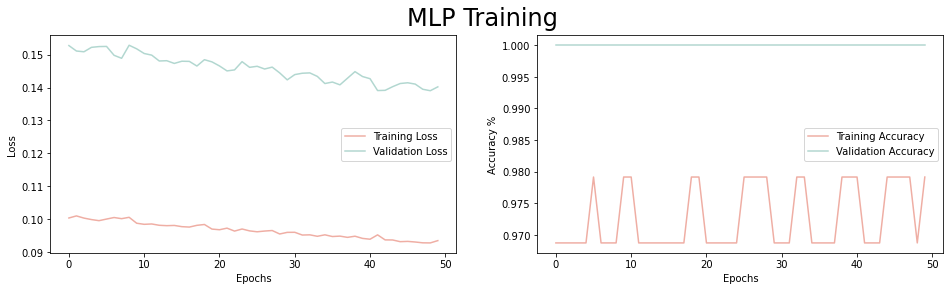

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax[0].plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax[1].plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

In [ ]:
train_accuracy = model.evaluate(X_train,y_train)[1]
test_accuracy = model.evaluate(X_test,y_test)[1]
print(f'The training set accuracy for the model is {train_accuracy}\
    \n The test set accuracy for the model is {test_accuracy}')

1/1 [==============================] - 0s 19ms/step - loss: 0.0871 - accuracy: 1.0000
The training set accuracy for the model is 0.9750000238418579    
 The test set accuracy for the model is 1.0


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, validation_split=0.2, batch_size = 16, verbose=0)

Text(0.5, 0.98, 'MLP Training')

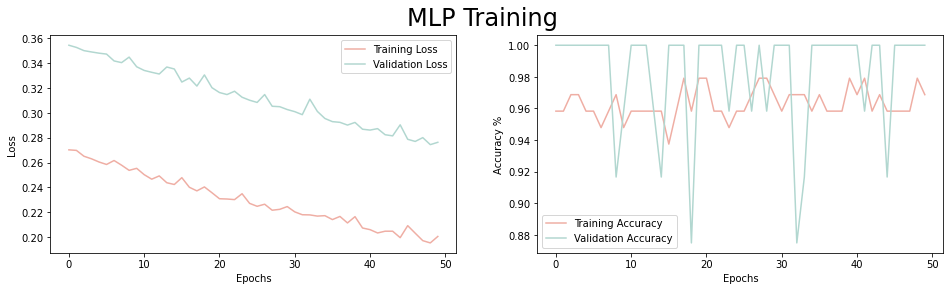

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax[0].plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax[1].plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

In [ ]:
train_accuracy = model.evaluate(X_train,y_train)[1]
test_accuracy = model.evaluate(X_test,y_test)[1]
print(f'The training set accuracy for the model is {train_accuracy}\
    \n The test set accuracy for the model is {test_accuracy}')

1/1 [==============================] - 0s 19ms/step - loss: 0.1653 - accuracy: 1.0000
The training set accuracy for the model is 0.9833333492279053    
 The test set accuracy for the model is 1.0
